## Part 1: Understanding Weight Initialization

### 1. Explain the importance of weight initialization in artificial neural networks. Why is it necessary to initialize the weights carefully?
### Ans: 
Weight initialization is a critical step in training artificial neural networks because it sets the initial conditions for the learning process. Proper weight initialization helps in:

- **Preventing vanishing/exploding gradients**: By carefully initializing the weights, we can avoid situations where gradients become too small (vanishing) or too large (exploding), which can hinder effective training.
- **Ensuring faster convergence**: Good initialization can place the network in a region of the parameter space where optimization can proceed more efficiently, leading to faster convergence.
- **Breaking symmetry**: Proper initialization ensures that each neuron starts with different weights, allowing the network to learn diverse features. If all weights are initialized to the same value, all neurons in a layer will learn the same thing, which is not desirable.

### 2. Describe the challenges associated with improper weight initialization. How do these issues affect model training and convergence?
### Ans: 
Improper weight initialization can lead to several challenges:

- **Vanishing gradients**: If the weights are initialized too small, the gradients during backpropagation can diminish to near zero as they propagate through the layers. This makes it difficult for the network to learn, as weight updates become negligible.
- **Exploding gradients**: Conversely, if the weights are initialized too large, the gradients can grow exponentially as they propagate, leading to very large updates. This can cause the network to become unstable and fail to converge.
- **Slow convergence**: Poor initialization can cause the optimization process to start far from the optimal point, requiring more epochs to converge.
- **Symmetry problem**: If all weights are initialized to the same value, neurons in the same layer will update in the same way during training, limiting the network’s ability to learn effectively.

### 3. Discuss the concept of variance and how it relates to weight initialization. Why is it crucial to consider the variance of weights during initialization?
### Ans: 
Variance plays a crucial role in weight initialization as it affects the distribution of activations and gradients throughout the network:

- **Maintaining activation variance**: Proper initialization ensures that the variance of the activations remains roughly constant across layers, preventing the activations from shrinking to zero or exploding.
- **Maintaining gradient variance**: Similarly, maintaining the variance of the gradients helps in stable and efficient training, preventing vanishing or exploding gradients.
- **Initialization schemes**: Techniques like Xavier (Glorot) and He initialization are designed to maintain the variance of activations and gradients by scaling the weights according to the size of the previous layer (number of input units). This helps in maintaining a healthy flow of information through the network, facilitating effective learning and faster convergence.

## Part 2: Weight Initialization Techniques

### 4. Explain the concept of zero initialization. Discuss its potential limitations and when it can be appropriate to use.
### Ans:
- **Zero Initialization**: This technique involves initializing all the weights in the network to zero.
  - **Limitations**: Zero initialization leads to symmetry breaking issues. When all weights are initialized to zero, all neurons in a layer will receive the same gradient during backpropagation, causing them to update in the same way and learn the same features. This makes the network equivalent to a single neuron and severely limits its learning capacity.
  - **Appropriate Use**: Zero initialization is rarely used for weights due to the symmetry problem. However, it can be used for initializing bias terms, which do not suffer from the same issues.

### 5. Describe the process of random initialization. How can random initialization be adjusted to mitigate potential issues like saturation or vanishing/exploding gradients?
### Ans: 
- **Random Initialization**: Involves initializing weights with random values from a specific distribution, typically a normal or uniform distribution.
  - **Mitigating Issues**: To avoid saturation (where neurons output values near the extremes of the activation function) or vanishing/exploding gradients, the random values can be scaled appropriately.
    - **Standard Normal Initialization**: Random values are drawn from a normal distribution with mean 0 and standard deviation 1. This can be further scaled to fit the needs of the network.
    - **Scaled Initialization**: Techniques like Xavier (Glorot) and He initialization adjust the variance of the random values based on the number of input and/or output units in a layer. This scaling helps maintain a healthy flow of activations and gradients.

### 6. Discuss the concept of Xavier/Glorot initialization. Explain how it addresses the challenges of improper weight initialization and the underlying theory behind it.
### Ans:
- **Xavier/Glorot Initialization**: Named after Xavier Glorot, this technique initializes weights from a distribution with a variance of \( \frac{2}{n_{in} + n_{out}} \), where \( n_{in} \) is the number of input units and \( n_{out} \) is the number of output units for a layer.
  - **Challenges Addressed**: By scaling the weights based on the number of input and output units, Xavier initialization maintains the variance of activations and gradients across layers, preventing vanishing and exploding gradients.
  - **Underlying Theory**: The method is based on the assumption that the weights should be initialized in a way that keeps the variance of the inputs and outputs across layers roughly equal. This helps in maintaining a balanced flow of information through the network, ensuring that gradients neither vanish nor explode, facilitating effective learning and faster convergence.

### 7. Explain the concept of He initialization. How does it differ from Xavier initialization, and when is it preferred?
### Ans:
- **He Initialization**: Named after Kaiming He, this technique initializes weights from a distribution with a variance of \( \frac{2}{n_{in}} \), where \( n_{in} \) is the number of input units for a layer.
  - **Differences from Xavier Initialization**: He initialization focuses only on the number of input units, leading to larger initial weights compared to Xavier initialization. This is particularly useful for activation functions like ReLU that tend to zero out negative inputs.
  - **Preferred Use**: He initialization is preferred when using activation functions like ReLU or its variants (e.g., Leaky ReLU, ELU). These functions can cause a significant portion of the neurons to become inactive (outputting zero) if the weights are not initialized properly. He initialization helps in maintaining the variance of activations in networks with ReLU, ensuring a good balance of active neurons and effective gradient flow.

## Part 3: Applying Weight Initialization
### 8. Implement different weight initialization techniques (zero initialization, random initialization, Xavier initialization, and He initialization) in a neural network using a framework of your choice. Train the model on a suitable dataset and compare the performance of the initialized models.

#### Importing Libraries

In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.initializers import Zeros, RandomNormal, GlorotNormal, HeNormal
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt


2024-08-04 17:44:27.112722: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-04 17:44:27.118358: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-04 17:44:27.137270: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-04 17:44:27.168810: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-04 17:44:27.178191: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-04 17:44:27.201773: I tensorflow/core/platform/cpu_feature_gu

####  Loading and Preprocessing the MNIST Dataset

In [2]:
# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the images to the range [0, 1]
x_train, x_test = x_train / 255.0, x_test / 255.0

# Flatten the images from (28, 28) to (784,)
x_train, x_test = x_train.reshape(-1, 784), x_test.reshape(-1, 784)

# One-hot encode the labels
y_train, y_test = to_categorical(y_train), to_categorical(y_test)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


#### Defining the Model Creation Function

In [3]:
def create_model(initializer):
    model = Sequential([
        Dense(256, activation='relu', kernel_initializer=initializer, input_shape=(784,)),
        Dense(128, activation='relu', kernel_initializer=initializer),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model


####  Initializing the Different Weight Initialization Techniques

In [4]:
initializers = {
    'Zero Initialization': Zeros(),
    'Random Initialization': RandomNormal(mean=0.0, stddev=0.05),
    'Xavier Initialization': GlorotNormal(),
    'He Initialization': HeNormal()
}


#### Training the Models with Different Initializers

In [5]:
results = {}

for name, initializer in initializers.items():
    print(f"Training with {name}")
    model = create_model(initializer)
    history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test), verbose=2)
    results[name] = history.history


Training with Zero Initialization


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 - 9s - 5ms/step - accuracy: 0.1117 - loss: 2.3015 - val_accuracy: 0.1135 - val_loss: 2.3012
Epoch 2/5
1875/1875 - 7s - 4ms/step - accuracy: 0.1124 - loss: 2.3014 - val_accuracy: 0.1135 - val_loss: 2.3010
Epoch 3/5
1875/1875 - 7s - 4ms/step - accuracy: 0.1124 - loss: 2.3014 - val_accuracy: 0.1135 - val_loss: 2.3010
Epoch 4/5
1875/1875 - 7s - 4ms/step - accuracy: 0.1124 - loss: 2.3013 - val_accuracy: 0.1135 - val_loss: 2.3011
Epoch 5/5
1875/1875 - 7s - 4ms/step - accuracy: 0.1124 - loss: 2.3013 - val_accuracy: 0.1135 - val_loss: 2.3010
Training with Random Initialization
Epoch 1/5
1875/1875 - 8s - 5ms/step - accuracy: 0.9374 - loss: 0.2107 - val_accuracy: 0.9639 - val_loss: 0.1142
Epoch 2/5
1875/1875 - 7s - 4ms/step - accuracy: 0.9746 - loss: 0.0828 - val_accuracy: 0.9743 - val_loss: 0.0834
Epoch 3/5
1875/1875 - 7s - 4ms/step - accuracy: 0.9819 - loss: 0.0578 - val_accuracy: 0.9754 - val_loss: 0.0833
Epoch 4/5
1875/1875 - 7s - 4ms/step - accuracy: 0.9862 - loss: 0.043

#### Comparing the Performance of Different Initializers

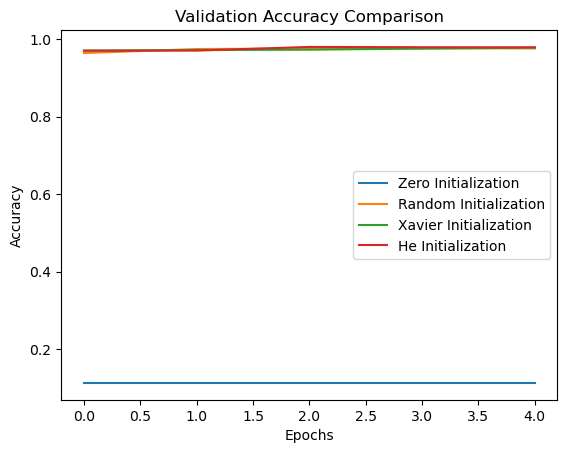

In [6]:
for name, history in results.items():
    plt.plot(history['val_accuracy'], label=name)

plt.title('Validation Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


### 9.  Discuss the considerations and tradeoffs when choosing the appropriate weight initialization technique for a given neural network architecture and task.
### Ans : 
* Architecture: Different architectures may benefit from different initializations (e.g., deeper networks may need He initialization for ReLU activations).


* Task: Some tasks might be more sensitive to initialization, requiring careful tuning.


* Activation Function: The choice of activation function (e.g., sigmoid vs. ReLU) influences the appropriate initialization method.


* Training Speed: Initializations that maintain variance can lead to faster convergence.


* Stability: Proper initialization helps in maintaining training stability, especially in deeper networks.
